In [1]:
import netCDF4 as nc
from netCDF4 import Dataset
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.legend_handler import HandlerPatch
import xarray as xr
import numpy as np
import pandas as pd
import calendar
import seaborn as sns
import seaborn_image as isns
import calendar

In [2]:
data_baseline = xr.open_dataset('/Volumes/FOCI_Archive_1/Data_Chiara/FOCI_Chiara/SSP1_2.6/Alk/ALK_baseline_ensemble1_ssp126_1m.nc', decode_times=True)

In [3]:
data_oae = xr.open_dataset('/Volumes/FOCI_Archive_1/Data_Chiara/FOCI_Chiara/SSP1_2.6/Alk/ALK_CDR_EU_coast_ssp126_1m.nc', decode_times=True)

In [4]:
mld_baseline = xr.open_dataset('/Volumes/UnionSine/Cropped_DataTransfer/mld&sst&swt/MLD_2.6/MLD_baseline_2.6_cropped.nc')

In [5]:
mld_oae = xr.open_dataset('/Volumes/UnionSine/Cropped_DataTransfer/mld&sst&swt/MLD_2.6/MLD_OAE_2.6_cropped.nc')

In [6]:
mask = xr.open_dataset('/Volumes/UnionSine/Cropped_DataTransfer/masks/tmaskm.nc')

In [7]:
mask = mask.tmask.isel(time=0)

In [8]:
sliced_data_baseline = mask.isel(x=slice(520,595),y=slice(330,435),z=slice(0,21)) * data_baseline.ALK.isel(x=slice(520,595),y=slice(330,435),deptht=slice(0,21))

In [ ]:
sliced_data_oae = mask.isel(x=slice(520,595),y=slice(330,435),z=slice(0,21)) * data_oae.ALK.isel(x=slice(520,595),y=slice(330,435),deptht=slice(0,21))

In [7]:
sliced_data_baseline = sliced_data_baseline.to_dataset(name='ALK')

In [ ]:
sliced_data_oae = sliced_data_oae.to_dataset(name='ALK')

In [22]:
layer_depth = mask.isel(x=slice(520,595),y=slice(330,435),z=slice(0,21))

In [23]:
layer_depth = layer_depth.sum('z') # m

In [24]:
layer_depth = layer_depth.where(layer_depth)

In [25]:
layer_depth = layer_depth.to_dataset(name='tmask')

In [26]:
layer_depth = layer_depth.to_dataframe()

In [29]:
# condition

max_depth = [
    (layer_depth.tmask == 1),
    (layer_depth.tmask == 2),
    (layer_depth.tmask == 3),
    (layer_depth.tmask == 4),
    (layer_depth.tmask == 5),
    (layer_depth.tmask == 6),
    (layer_depth.tmask == 7),
    (layer_depth.tmask == 8),
    (layer_depth.tmask == 9),
    (layer_depth.tmask == 10),
    (layer_depth.tmask == 11),
    (layer_depth.tmask == 12),
    (layer_depth.tmask == 13),
    (layer_depth.tmask == 14),
    (layer_depth.tmask == 15),
    (layer_depth.tmask == 16),
    (layer_depth.tmask == 17),
    (layer_depth.tmask == 18),
    (layer_depth.tmask == 19),
    (layer_depth.tmask == 20),
    (layer_depth.tmask == 21)
]

values_depth = [3.046773e+00, 9.454049e+00, 1.636397e+01, 2.389871e+01, 3.220929e+01,
        4.148186e+01, 5.194513e+01, 6.387905e+01, 7.762451e+01, 9.359413e+01,
        1.122835e+02, 1.342823e+02, 1.602840e+02, 1.910925e+02, 2.276233e+02,
        2.708962e+02, 3.220169e+02, 3.821444e+02, 4.524429e+02, 5.340197e+02,
        6.278525e+02]

layer_depth['tmask'] = np.select(max_depth, values_depth)

In [30]:
layer_depth = layer_depth.drop(columns='time')

In [31]:
layer_depth = layer_depth.to_xarray()

In [32]:
layer_depth = layer_depth.where(layer_depth)

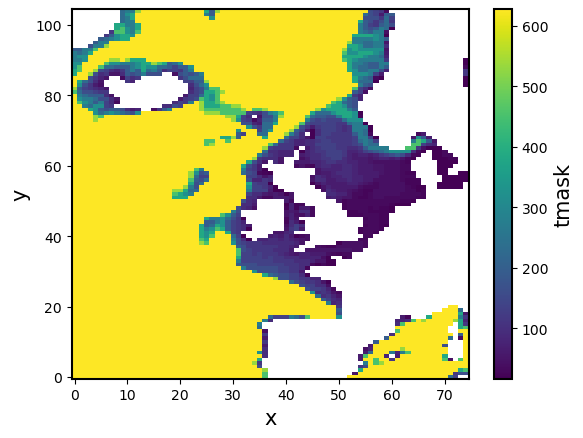

In [35]:
layer_depth.tmask.plot()

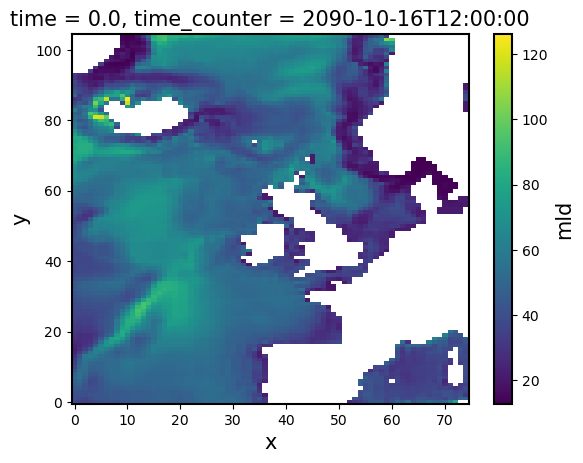

In [50]:
mld_baseline.mld.isel(time_counter=909).plot()